# SI figure: lineplot and lollipop plot


In [1]:
import os
import xarray as xr
import pickle as pk
import time
import matplotlib as mpl
from matplotlib.patches import Rectangle

import cartopy.crs as ccrs
import cartopy.feature as cfeature

from settings import *
from load_manip import *
from exposure import * 
from utils import *
from main_function import *

# Script to plot countries
from plotting import *

# set own plotting parameters
set_plot_param()
map_proj = ccrs.Robinson(central_longitude=0, globe=None)


labelfontsize=16
titlesize=16
labelsize=titlesize
mpl.rc('xtick',labelsize=labelfontsize)
mpl.rc('ytick',labelsize=labelfontsize)
mpl.rc('axes',titlesize=titlesize)
mpl.rc('axes',labelsize=labelsize)
mpl.rc('legend',fontsize='large')


%matplotlib inline 

/apps/brussel/RL8/broadwell/software/Python/3.10.4-GCCcore-11.3.0/lib/python3.10/site-packages/paramiko/transport.py:236: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
# extreme event
global flags

flags = {}
flags['extr'] = 'waterdeficit'   # 0: all
                                  # 2: cropfailedarea
                                  # 3: waterscarcity
                                  # 4: falkenmark 
                                  # 5: water deficit
flags['mode'] = 'exposure'   # whether to calculate exposure, duration, intensity or all. 

flags['runs'] = 0           # 0: do not process ISIMIP runs (i.e. load runs pickle)
                            # 1: process ISIMIP runs (i.e. produce and save runs as pickle)
flags['mask'] = 0           # 0: do not process country data (i.e. load masks pickle)
                            # 1: process country data (i.e. produce and save masks as pickle)
flags['exposure'] = 0     # 0: do not process ISIMIP runs to compute exposure (i.e. load exposure pickle)
                            # 1: process ISIMIP runs to compute exposure (i.e. produce and save exposure as pickle)
flags['exposure_pic'] = 0   # 0: do not process ISIMIP runs to compute picontrol exposure (i.e. load exposure pickle)
                            # 1: process ISIMIP runs to compute picontrol exposure (i.e. produce and save exposure as pickle)

flags['expectancy'] = 0     # 1: apply option of constant life expectancy

    
# settings for plotting
    
flag_region = 'world'    
regions = {'world': ['East Asia & Pacific', 'Europe & Central Asia', 'Latin America & Caribbean', 'Middle East & North Africa', 'North America', 'South Asia', 'Sub-Saharan Africa'], 
           'income' :[  'Lower middle income','Low income', 'High income','Upper middle income',]}

regions_abbrevs = {'world': ['EASP','EUCA','LAMC','MENA','NAM','SAS','SSA'], 
                  'income' : [  'Lower middle income','Low income', 'High income','Upper middle income',]}

colors = {'world': ['wheat', 'lightsteelblue','palegoldenrod','thistle','darkseagreen','lightpink','paleturquoise'],
         'income' : ['lightsteelblue','darkseagreen','wheat','lightpink']}

colors = {'world': {'Europe & Central Asia' : 'tab:blue', 'Latin America & Caribbean':'tab:orange','East Asia & Pacific': 'tab:green','South Asia': 'tab:pink','Sub-Saharan Africa': 'tab:red','North America':'tab:purple',  'Middle East & North Africa': 'tab:brown'},
         'income' : {'Upper middle income': 'tab:blue','Lower middle income': 'tab:orange','High income' : 'tab:green','Low income':'tab:red'}}

rcps = ['RCP60','RCP26']
rcp_text = {'RCP60': 'RCP 6.0', 'RCP26' : 'RCP 2.6'  }

panellabels = ['a.','b.','c.','d.','e.','f.','g.','h.','i.','j.','k.','l.','m.','n.']


# TODO: add rest of flags

### Load and manipulate  files for plotting

In [3]:
# load country borders (from pickles)

d_countries = pk.load(open('./data/pickles/country_info.pkl', 'rb'))
df_countries = d_countries['info_pop']

# unpack country information
gdf_country_borders = d_countries['borders']

# load cohort info
d_regions = pk.load(open('./data/pickles/region_info.pkl', 'rb'))

# unpack region information
df_birthyears_regions = d_regions['birth_years']
df_life_expectancy_5_regions = d_regions['life_expectancy_5']
d_cohort_weights_regions = d_regions['cohort_size']

## Calculate water deficit

In [4]:
# Calculate water deficit per RCP
ds_pct_waterdeficit, ds_pct_waterdeficit_perregion, a, b = calc_lifetime_waterdeficit(flags)


Loading processed country and region data
Loading processed isimip data
Loading processed exposures


/apps/brussel/RL8/broadwell/software/SciPy-bundle/2022.05-foss-2022a/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1584: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/apps/brussel/RL8/broadwell/software/SciPy-bundle/2022.05-foss-2022a/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1584: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/apps/brussel/RL8/broadwell/software/SciPy-bundle/2022.05-foss-2022a/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1584: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/apps/brussel/RL8/broadwell/software/SciPy-bundle/2022.05-foss-2022a/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1584: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


Loading processed country and region data
Loading processed isimip data
Loading processed exposures


/apps/brussel/RL8/broadwell/software/SciPy-bundle/2022.05-foss-2022a/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1584: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/apps/brussel/RL8/broadwell/software/SciPy-bundle/2022.05-foss-2022a/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1584: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/apps/brussel/RL8/broadwell/software/SciPy-bundle/2022.05-foss-2022a/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1584: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/apps/brussel/RL8/broadwell/software/SciPy-bundle/2022.05-foss-2022a/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1584: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/apps/brussel/RL8/broadwell/software/SciPy-bundle/2022.05-foss-2022a/lib

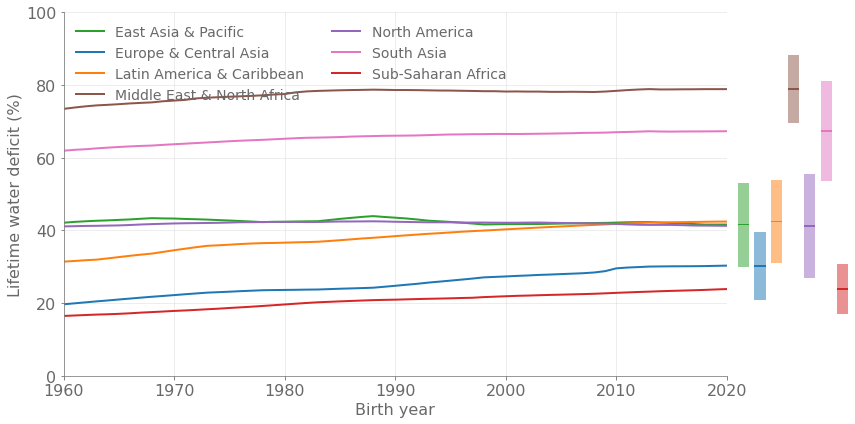

In [5]:
# plot delta compared to 1960 birth cohort

fig = plt.figure(figsize=(12,6))

ax = plt.subplot2grid(shape=(1,1), loc=(0,0), colspan=1)


flag_uncertainty = 'std' # std
    
var_type = ''#'delta_'

rcp = 'RCP60'
var = 'mmm_'+var_type+rcp


# sort regions based on values for 2020 birth year (for plotting uncertainty bar)
da_tosort = ds_pct_waterdeficit_perregion.sel(birth_year = 2020)[var]
regions_sorted = da_tosort.sortby(da_tosort, ascending=False)['region'].values
regions_toloop = [region for region in regions_sorted if region in regions[flag_region]]

for j, region in enumerate(regions[flag_region]):  

        ds_pct_waterdeficit_perregion.sel({'region':region})[var].plot(ax=ax, label=region, linewidth=2, color = colors[flag_region][region])

        # draw uncertainty rectangles

        # get values
        end_year = ds_pct_waterdeficit_perregion.birth_year.max()
        lqntl = ds_pct_waterdeficit_perregion.sel({'region':region})['lqntl_'+var_type+rcp].sel(birth_year = end_year).values
        uqntl = ds_pct_waterdeficit_perregion.sel({'region':region})['uqntl_'+var_type+rcp].sel(birth_year = end_year).values

        std = ds_pct_waterdeficit_perregion.sel({'region':region})['std_'+var_type+rcp].sel(birth_year = end_year).values
        mean = ds_pct_waterdeficit_perregion.sel({'region':region})['mmm_'+var_type+rcp].sel(birth_year = end_year).values

        if flag_uncertainty == 'std': 
            lower = mean - std 
            upper = mean + std                
        else: 
            lower = lqntl 
            upper = uqntl

        width = upper - lower

        # define width of the mean bar
        mean_width = 0.5
        offset = 0.5


        # quantile        
        ax.add_patch(Rectangle((end_year+1+j+j*offset,lower), 1, width, facecolor=colors[flag_region][region], clip_on=False,linewidth = 0, alpha=0.5))
        ax.add_patch(Rectangle((end_year+1+j+j*offset,mean-mean_width/2), 1, mean_width, facecolor=colors[flag_region][region], clip_on=False,linewidth = 0))     



ax.legend(bbox_to_anchor=(1.52,0.5), loc='right',frameon=False)
ax.legend(loc='upper left',frameon=False, ncol=2, fontsize=14)

#ax.set_title(rcp_text[rcp], loc='right')
ax.set_title('', loc='center')
#ax.set_title(panellabels[i], loc='left')

ax.set_xlim((1960,2020))
ax.set_ylim((0,100))

ax.set_xlabel('Birth year')
ax.set_ylabel('Lifetime water deficit (%)')
ax.grid(color='lightgray', alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)        

fig.tight_layout()
plt.savefig('figures/lineplot.png', bbox_inches='tight',dpi=100)

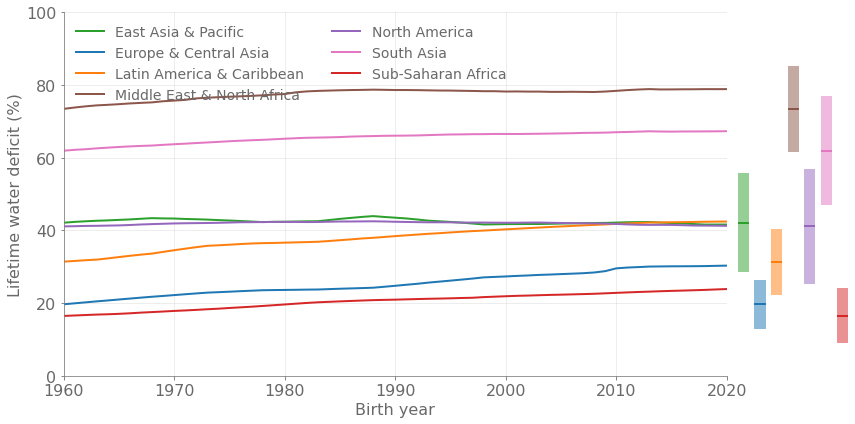

In [6]:
# plot delta compared to 1960 birth cohort

fig = plt.figure(figsize=(12,6))

ax = plt.subplot2grid(shape=(1,1), loc=(0,0), colspan=1)


flag_uncertainty = 'std' # std
    
var_type = ''#'delta_'

rcp = 'RCP60'
var = 'mmm_'+var_type+rcp


# sort regions based on values for 2020 birth year (for plotting uncertainty bar)
da_tosort = ds_pct_waterdeficit_perregion.sel(birth_year = 2020)[var]
regions_sorted = da_tosort.sortby(da_tosort, ascending=False)['region'].values
regions_toloop = [region for region in regions_sorted if region in regions[flag_region]]

for j, region in enumerate(regions[flag_region]):  

        ds_pct_waterdeficit_perregion.sel({'region':region})[var].plot(ax=ax, label=region, linewidth=2, color = colors[flag_region][region])

        # draw uncertainty rectangles

        # get values
        end_year = ds_pct_waterdeficit_perregion.birth_year.max()
        lqntl = ds_pct_waterdeficit_perregion.sel({'region':region})['lqntl_'+var_type+rcp].sel(birth_year = 1960).values
        uqntl = ds_pct_waterdeficit_perregion.sel({'region':region})['uqntl_'+var_type+rcp].sel(birth_year = 1960).values

        std = ds_pct_waterdeficit_perregion.sel({'region':region})['std_'+var_type+rcp].sel(birth_year = 1960).values
        mean = ds_pct_waterdeficit_perregion.sel({'region':region})['mmm_'+var_type+rcp].sel(birth_year = 1960).values

        if flag_uncertainty == 'std': 
            lower = mean - std 
            upper = mean + std                
        else: 
            lower = lqntl 
            upper = uqntl

        width = upper - lower

        # define width of the mean bar
        mean_width = 0.5
        offset = 0.5


        # quantile        
        ax.add_patch(Rectangle((end_year+1+j+j*offset,lower), 1, width, facecolor=colors[flag_region][region], clip_on=False,linewidth = 0, alpha=0.5))
        ax.add_patch(Rectangle((end_year+1+j+j*offset,mean-mean_width/2), 1, mean_width, facecolor=colors[flag_region][region], clip_on=False,linewidth = 0))     



ax.legend(bbox_to_anchor=(1.52,0.5), loc='right',frameon=False)
ax.legend(loc='upper left',frameon=False, ncol=2, fontsize=14)

#ax.set_title(rcp_text[rcp], loc='right')
ax.set_title('', loc='center')
#ax.set_title(panellabels[i], loc='left')

ax.set_xlim((1960,2020))
ax.set_ylim((0,100))

ax.set_xlabel('Birth year')
ax.set_ylabel('Lifetime water deficit (%)')
ax.grid(color='lightgray', alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)        

fig.tight_layout()
plt.savefig('figures/lineplot.png', bbox_inches='tight',dpi=100)

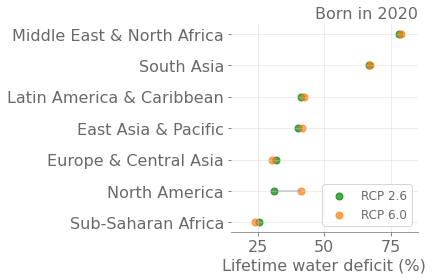

In [7]:

fig, ax = plt.subplots(1,1, figsize=(6,4))
birth_year = 2020


df_rcp26 = ds_pct_waterdeficit_perregion[ 'mmm_RCP26'].sel(birth_year=birth_year).to_dataframe().drop(['birth_year'],axis=1)
values_rcp60 = ds_pct_waterdeficit_perregion[ 'mmm_RCP60'].sel(birth_year=birth_year).values

values = np.stack((df_rcp26.index.values,np.squeeze(df_rcp26.values),values_rcp60))
df = pd.DataFrame(values.T, columns=['regions','RCP26','RCP60'])

df = df[df["regions"].isin(regions[flag_region])]
#if i == 0: 
regions_ordered = df.sort_values(by='RCP26',ascending=True)["regions"].values

df['regions_cat'] = pd.Categorical(df['regions'], categories=regions_ordered, ordered=True)
df = df.sort_values(by='regions_cat')

my_range=range(1,len(df.index)+1)

ax.hlines(y=my_range, xmin=df['RCP26'], xmax=df['RCP60'], color='grey', alpha=0.4)
ax.scatter(df['RCP26'], my_range, color='green', alpha=0.7, s=50, label='RCP 2.6')
ax.scatter(df['RCP60'], my_range, color='tab:orange', alpha=0.7 , s=50,label='RCP 6.0')
ax.legend(loc='lower right');

ax.set_yticks(my_range)
ax.set_yticklabels(df['regions']); 

ax.spines[['right', 'left', 'top']].set_visible(False)    

ax.set_xlabel('Lifetime water deficit (%)')
ax.set_title('Born in '+str(birth_year), loc='right');
ax.grid(color='lightgray', alpha=0.5)
ax.set_xlim((15,85));

fig.tight_layout()

plt.savefig('figures/rcp_lollipop.png', bbox_inches='tight',dpi=100)


## OLD

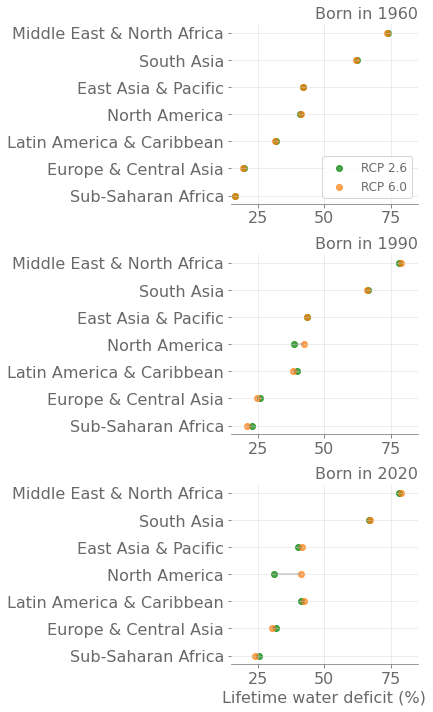

In [8]:

fig, axes = plt.subplots(3,1, figsize=(6,10))
axes=axes.flatten()
birth_years = [1960,1990,2020]

for i,birth_year in enumerate(birth_years):
    
    ax=axes[i]
    df_rcp26 = ds_pct_waterdeficit_perregion[ 'mmm_RCP26'].sel(birth_year=birth_year).to_dataframe().drop(['birth_year'],axis=1)
    values_rcp60 = ds_pct_waterdeficit_perregion[ 'mmm_RCP60'].sel(birth_year=birth_year).values

    values = np.stack((df_rcp26.index.values,np.squeeze(df_rcp26.values),values_rcp60))
    df = pd.DataFrame(values.T, columns=['regions','RCP26','RCP60'])

    df = df[df["regions"].isin(regions[flag_region])]
    if i == 0: 
        regions_ordered = df.sort_values(by='RCP26',ascending=True)["regions"].values
        
    df['regions_cat'] = pd.Categorical(df['regions'], categories=regions_ordered, ordered=True)
    df = df.sort_values(by='regions_cat')

    my_range=range(1,len(df.index)+1)


    ax.hlines(y=my_range, xmin=df['RCP26'], xmax=df['RCP60'], color='grey', alpha=0.4)
    ax.scatter(df['RCP26'], my_range, color='green', alpha=0.7, label='RCP 2.6')
    ax.scatter(df['RCP60'], my_range, color='tab:orange', alpha=0.7 , label='RCP 6.0')
    if i ==0: 
        ax.legend(loc='lower right');

    ax.set_yticks(my_range)
    ax.set_yticklabels(df['regions']); 

    ax.spines[['right', 'left', 'top']].set_visible(False)    
    if i == len(axes)-1: 
        ax.set_xlabel('Lifetime water deficit (%)')
    ax.set_title('Born in '+str(birth_year), loc='right');
    ax.grid(color='lightgray', alpha=0.5)
    ax.set_xlim((15,85));
    
fig.tight_layout()

plt.savefig('figures/rcp_lollipop.png', bbox_inches='tight',dpi=100)
